In [1]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('output/loan_dev_transformed.csv')
data.columns

Index(['Id', 'loan_date', 'loan_duration', 'loan_payments', 'Predicted',
       'account_frequency', 'account_district_region',
       'account_district_no_inhabitants',
       'account_district_no_municipalities_0_499',
       'account_district_no_municipalities_500_1999',
       'account_district_no_municipalities_2000_9999',
       'account_district_no_municipalities_10000_plus',
       'account_district_no_cities',
       'account_district_ratio_urban_inhabitants',
       'account_district_average_salary',
       'account_district_unemployment_rate_95',
       'account_district_unemployment_rate_96',
       'account_district_no_enterpreneurs_per_1000_inhabitants',
       'account_district_no_crimes_95', 'account_district_no_crimes_96',
       'owner_card_type', 'owner_district_region',
       'owner_district_no_inhabitants',
       'owner_district_no_municipalities_0_499',
       'owner_district_no_municipalities_500_1999',
       'owner_district_no_municipalities_2000_9999',
     

In [4]:
input_cols = [
#'Id',
'loan_date',
'loan_duration',
'loan_payments',
'Predicted',
'account_frequency',
'account_district_region',
'account_district_no_inhabitants',
'account_district_no_municipalities_0_499',
'account_district_no_municipalities_500_1999',
'account_district_no_municipalities_2000_9999',
'account_district_no_municipalities_10000_plus',
'account_district_no_cities',
'account_district_ratio_urban_inhabitants',
'account_district_average_salary',
'account_district_unemployment_rate_95',
'account_district_unemployment_rate_96',
'account_district_no_enterpreneurs_per_1000_inhabitants',
'account_district_no_crimes_95',
'account_district_no_crimes_96',
'owner_card_type',
'owner_district_region',
'owner_district_no_inhabitants',
'owner_district_no_municipalities_0_499',
'owner_district_no_municipalities_500_1999',
'owner_district_no_municipalities_2000_9999',
'owner_district_no_municipalities_10000_plus',
'owner_district_no_cities',
'owner_district_ratio_urban_inhabitants',
'owner_district_average_salary',
'owner_district_unemployment_rate_95',
'owner_district_unemployment_rate_96',
'owner_district_no_enterpreneurs_per_1000_inhabitants',
'owner_district_no_crimes_95',
'owner_district_no_crimes_96',
'count_trans_credits',
'count_trans_withdrawals',
'count_trans_credit_cash',
'count_trans_withdrawal_cash',
'count_trans_withdrawal_card',
'count_trans_collection_other_bank',
'count_trans_remittance_other_bank',
'count_trans_ksymbol_interest_credited',
'count_trans_ksymbol_household',
'count_trans_ksymbol_payment_for_statement',
'count_trans_ksymbol_insurance_payment',
'count_trans_ksymbol_sanction_interest_if_negative_balance',
'count_trans_ksymbol_oldage_pension',
'last_trans_balance',
'mean_trans_balance',
'mean_trans_amount_absolute',
'mean_trans_amount_credit',
'mean_trans_amount_withdrawal',
'mean_trans_amount_signed',
'owner_male',
'owner_age',
'account_age_months',
'has_disponent',
'owner_profile'
]

In [5]:
data = data[input_cols]

In [6]:
with_nulls = []
for i in data.isna().any().iteritems():
    if i[1]:
        with_nulls.append(i[0])
        print(i[0])

C:\Users\nrtc\AppData\Local\Temp\ipykernel_18232\1025888907.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i in data.isna().any().iteritems():


In [7]:
def corr_plot(corr):

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

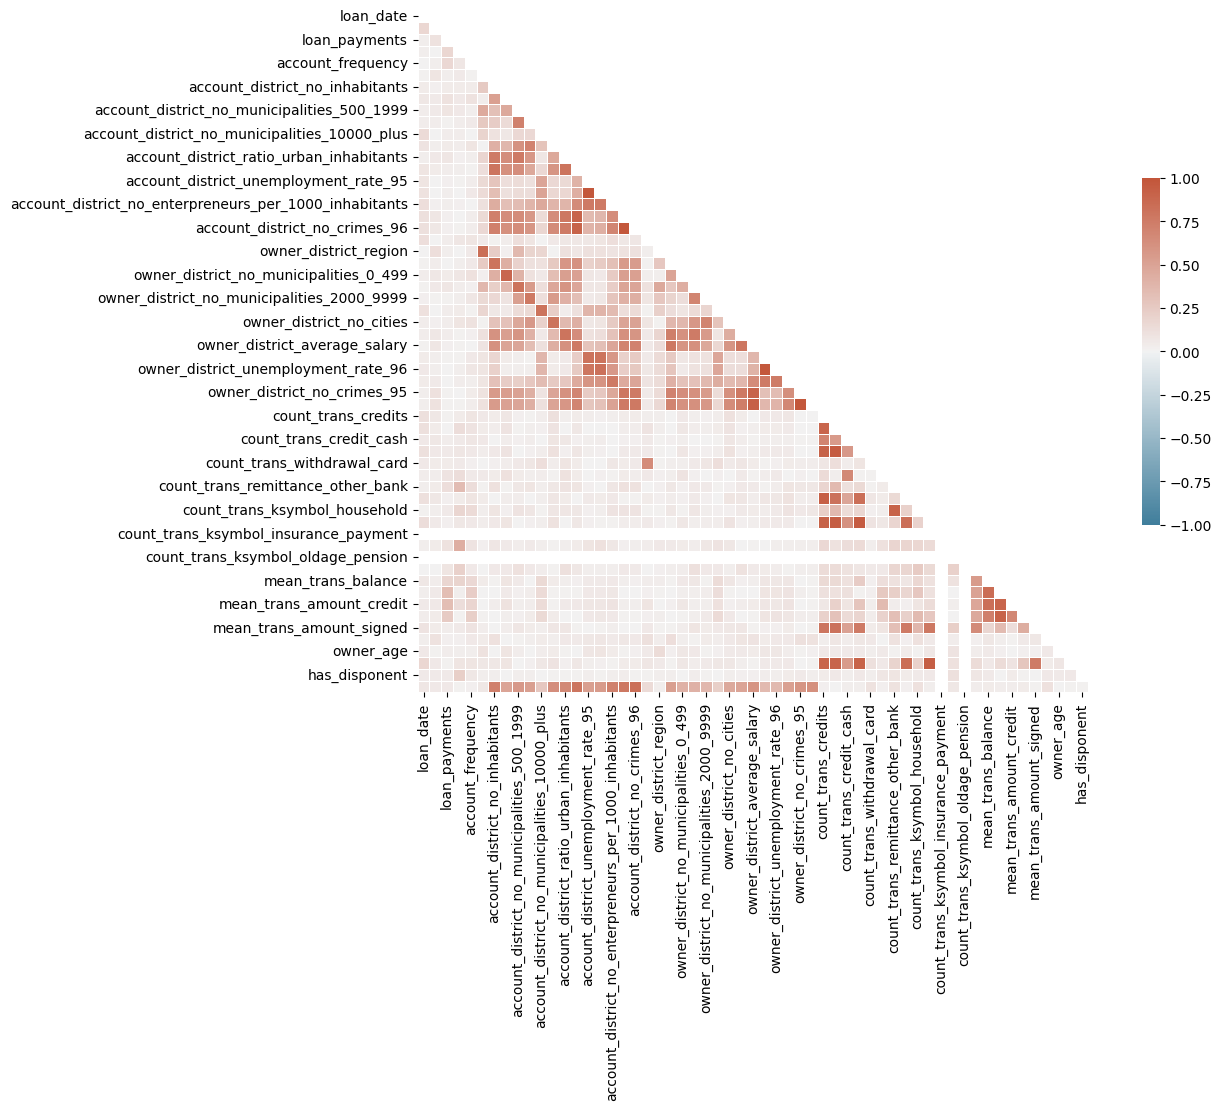

In [8]:
cor_matrix = data[input_cols].corr().abs()
corr_plot(cor_matrix)

In [ ]:
val = cor_matrix['Predicted'].sort_values(ascending=True)
sorted_columns = val.index.values
sorted_columns

array(['loan_duration', 'owner_district_no_crimes_95',
       'owner_district_region', 'owner_district_unemployment_rate_95',
       'owner_district_no_crimes_96',
       'owner_district_ratio_urban_inhabitants',
       'owner_district_average_salary', 'owner_male',
       'owner_district_no_inhabitants', 'owner_age',
       'owner_district_unemployment_rate_96', 'loan_date',
       'owner_district_no_municipalities_2000_9999',
       'mean_trans_amount_absolute',
       'owner_district_no_municipalities_500_1999',
       'owner_district_no_enterpreneurs_per_1000_inhabitants',
       'owner_district_no_municipalities_10000_plus',
       'count_trans_ksymbol_interest_credited', 'count_trans_credits',
       'mean_trans_amount_signed', 'count_trans_withdrawal_card',
       'count_trans_credit_cash',
       'count_trans_ksymbol_payment_for_statement', 'owner_card_type',
       'mean_trans_amount_withdrawal',
       'owner_district_no_municipalities_0_499',
       'count_trans_withdrawal_c

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

C:\Users\nrtc\AppData\Local\Temp\ipykernel_10612\918335127.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,loan_date,loan_duration,loan_payments,Predicted,account_frequency,owner_card_type,owner_district_region,owner_district_no_inhabitants,owner_district_no_municipalities_0_499,owner_district_no_municipalities_500_1999,...,last_trans_balance,mean_trans_balance,mean_trans_amount_absolute,mean_trans_amount_credit,mean_trans_amount_withdrawal,mean_trans_amount_signed,owner_male,owner_age,account_age_months,has_disponent
loan_date,NaN,0.170184,0.025881,0.029130,0.000236,0.133088,0.001408,0.013724,0.038074,0.014599,...,0.004810,0.064522,0.026537,0.050538,0.002139,0.091287,0.028090,0.055630,0.168565,0.048900
loan_duration,NaN,NaN,0.096113,0.003537,0.028010,0.023439,0.118137,0.035288,0.063088,0.060095,...,0.007762,0.038194,0.051185,0.061208,0.075257,0.045713,0.100833,0.007869,0.056736,0.051691
loan_payments,NaN,NaN,NaN,0.168436,0.159833,0.041488,0.028649,0.005940,0.045710,0.072741,...,0.082749,0.176371,0.328895,0.333356,0.310138,0.031960,0.020697,0.035160,0.015150,0.052673
Predicted,NaN,NaN,NaN,NaN,0.076336,0.066009,0.007812,0.024810,0.074296,0.035389,...,0.210634,0.193985,0.031162,0.126995,0.071749,0.047906,0.022487,0.026815,0.079671,0.219900
account_frequency,NaN,NaN,NaN,NaN,NaN,0.143540,0.051573,0.057524,0.103778,0.022855,...,0.057356,0.162203,0.232862,0.181510,0.244279,0.092088,0.055578,0.030801,0.082770,0.064360
owner_card_type,NaN,NaN,NaN,NaN,NaN,NaN,0.024557,0.012885,0.024085,0.105058,...,0.010548,0.032582,0.015726,0.050980,0.005882,0.044356,0.120593,0.070277,0.051759,0.016017
owner_district_region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.268309,0.026847,0.463854,...,0.021852,0.038912,0.014071,0.005530,0.022739,0.013143,0.037595,0.136418,0.054273,0.023845
owner_district_no_inhabitants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496854,0.272883,...,0.031224,0.014180,0.004140,0.022645,0.003051,0.015256,0.121413,0.023360,0.012058,0.026978
owner_district_no_municipalities_0_499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.436325,...,0.034801,0.062476,0.029416,0.068017,0.003244,0.032771,0.030147,0.069346,0.066278,0.002908
owner_district_no_municipalities_500_1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.113410,0.064513,0.025902,0.025780,0.029876,0.083305,0.014564,0.054762,0.037322,0.038947


In [12]:
corr = data.corr().abs()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
removed_columns = data.columns[~columns]
removed_columns


Index(['account_district_unemployment_rate_96',
       'account_district_no_crimes_95', 'account_district_no_crimes_96',
       'owner_district_region', 'owner_district_no_inhabitants',
       'owner_district_no_municipalities_0_499',
       'owner_district_no_municipalities_500_1999',
       'owner_district_no_municipalities_10000_plus',
       'owner_district_unemployment_rate_95',
       'owner_district_unemployment_rate_96', 'owner_district_no_crimes_95',
       'owner_district_no_crimes_96', 'count_trans_withdrawals',
       'count_trans_withdrawal_cash', 'count_trans_ksymbol_interest_credited',
       'count_trans_ksymbol_household',
       'count_trans_ksymbol_payment_for_statement',
       'mean_trans_amount_absolute', 'mean_trans_amount_credit',
       'mean_trans_amount_withdrawal', 'mean_trans_amount_signed',
       'account_age_months', 'owner_profile'],
      dtype='object')

In [10]:
selected_columns = selected_columns[1:].values
selected_columns.shape

(34,)

In [11]:
selected_columns

array(['loan_duration', 'loan_payments', 'Predicted', 'account_frequency',
       'account_district_region', 'account_district_no_inhabitants',
       'account_district_no_municipalities_0_499',
       'account_district_no_municipalities_500_1999',
       'account_district_no_municipalities_2000_9999',
       'account_district_no_municipalities_10000_plus',
       'account_district_no_cities',
       'account_district_ratio_urban_inhabitants',
       'account_district_average_salary',
       'account_district_unemployment_rate_95',
       'account_district_no_enterpreneurs_per_1000_inhabitants',
       'owner_card_type', 'owner_district_no_municipalities_2000_9999',
       'owner_district_no_cities',
       'owner_district_ratio_urban_inhabitants',
       'owner_district_average_salary',
       'owner_district_no_enterpreneurs_per_1000_inhabitants',
       'count_trans_credits', 'count_trans_credit_cash',
       'count_trans_withdrawal_card', 'count_trans_collection_other_bank',
      

In [ ]:
print(f'Removed {len(data.columns) - len(selected_columns)} columns')

Removed 14 columns


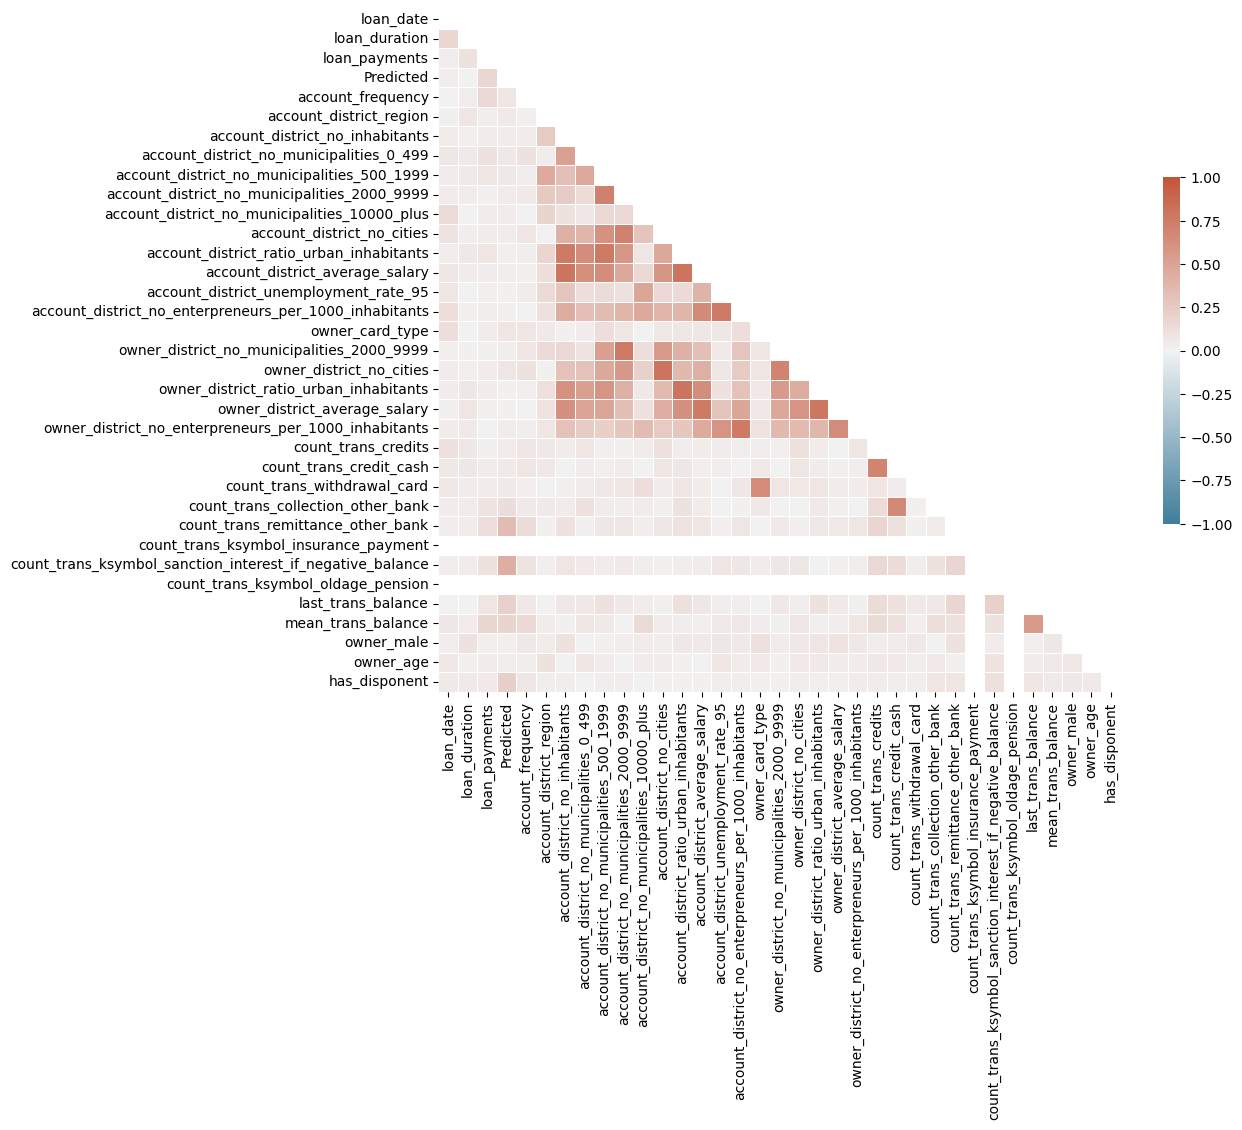

In [14]:
data = data[selected_columns]
corr_plot(data.corr().abs())

C:\Users\nrtc\AppData\Local\Temp\ipykernel_18232\235105374.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i][data['Predicted']==0], color='g', label = 'approved')
C:\Users\nrtc\AppData\Local\Temp\ipykernel_18232\235105374.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i][data

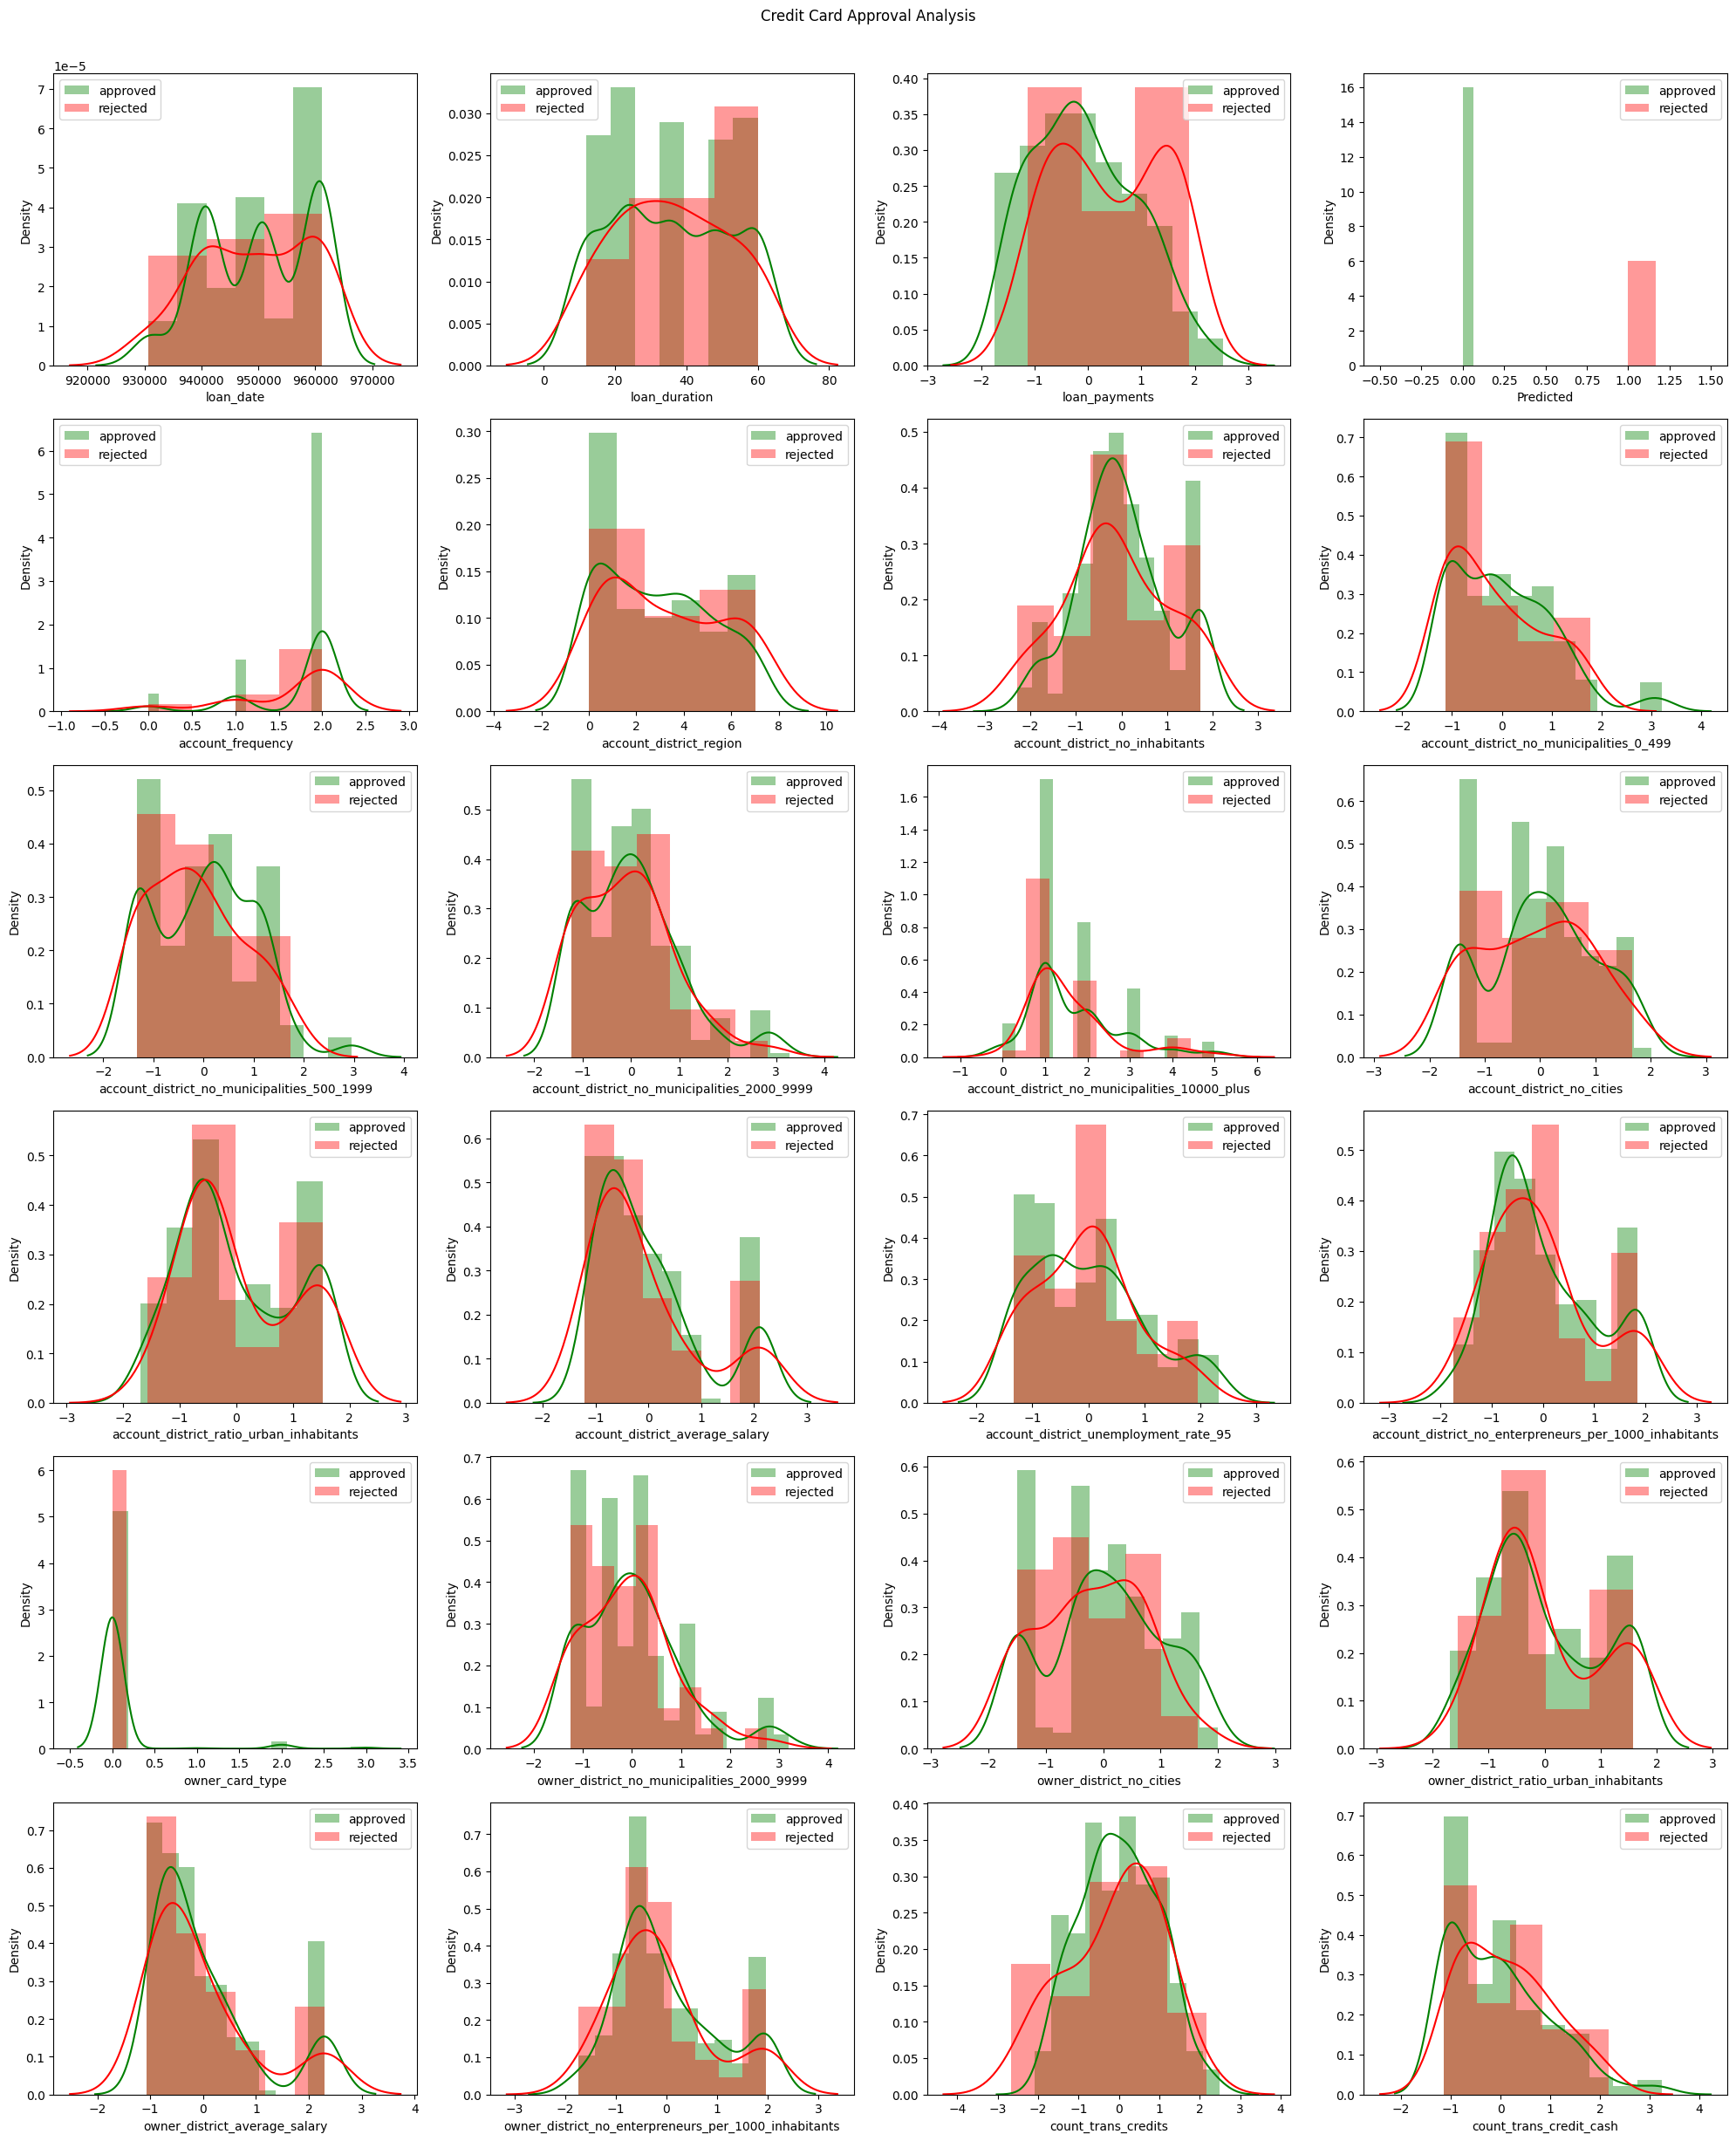

In [17]:
fig = plt.figure(figsize = (20, 25))
for j in range(0, 24):
    i = data.columns[j]
    plt.subplot(6, 4, j+1)
    sns.distplot(data[i][data['Predicted']==0], color='g', label = 'approved')
    sns.distplot(data[i][data['Predicted']==1], color='r', label = 'rejected')
    plt.legend(loc='best')
fig.suptitle('Credit Card Approval Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

C:\Users\nrtc\AppData\Local\Temp\ipykernel_18232\2728459277.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i][data['Predicted']==0], color='g', label = 'approved')
C:\Users\nrtc\AppData\Local\Temp\ipykernel_18232\2728459277.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i][da

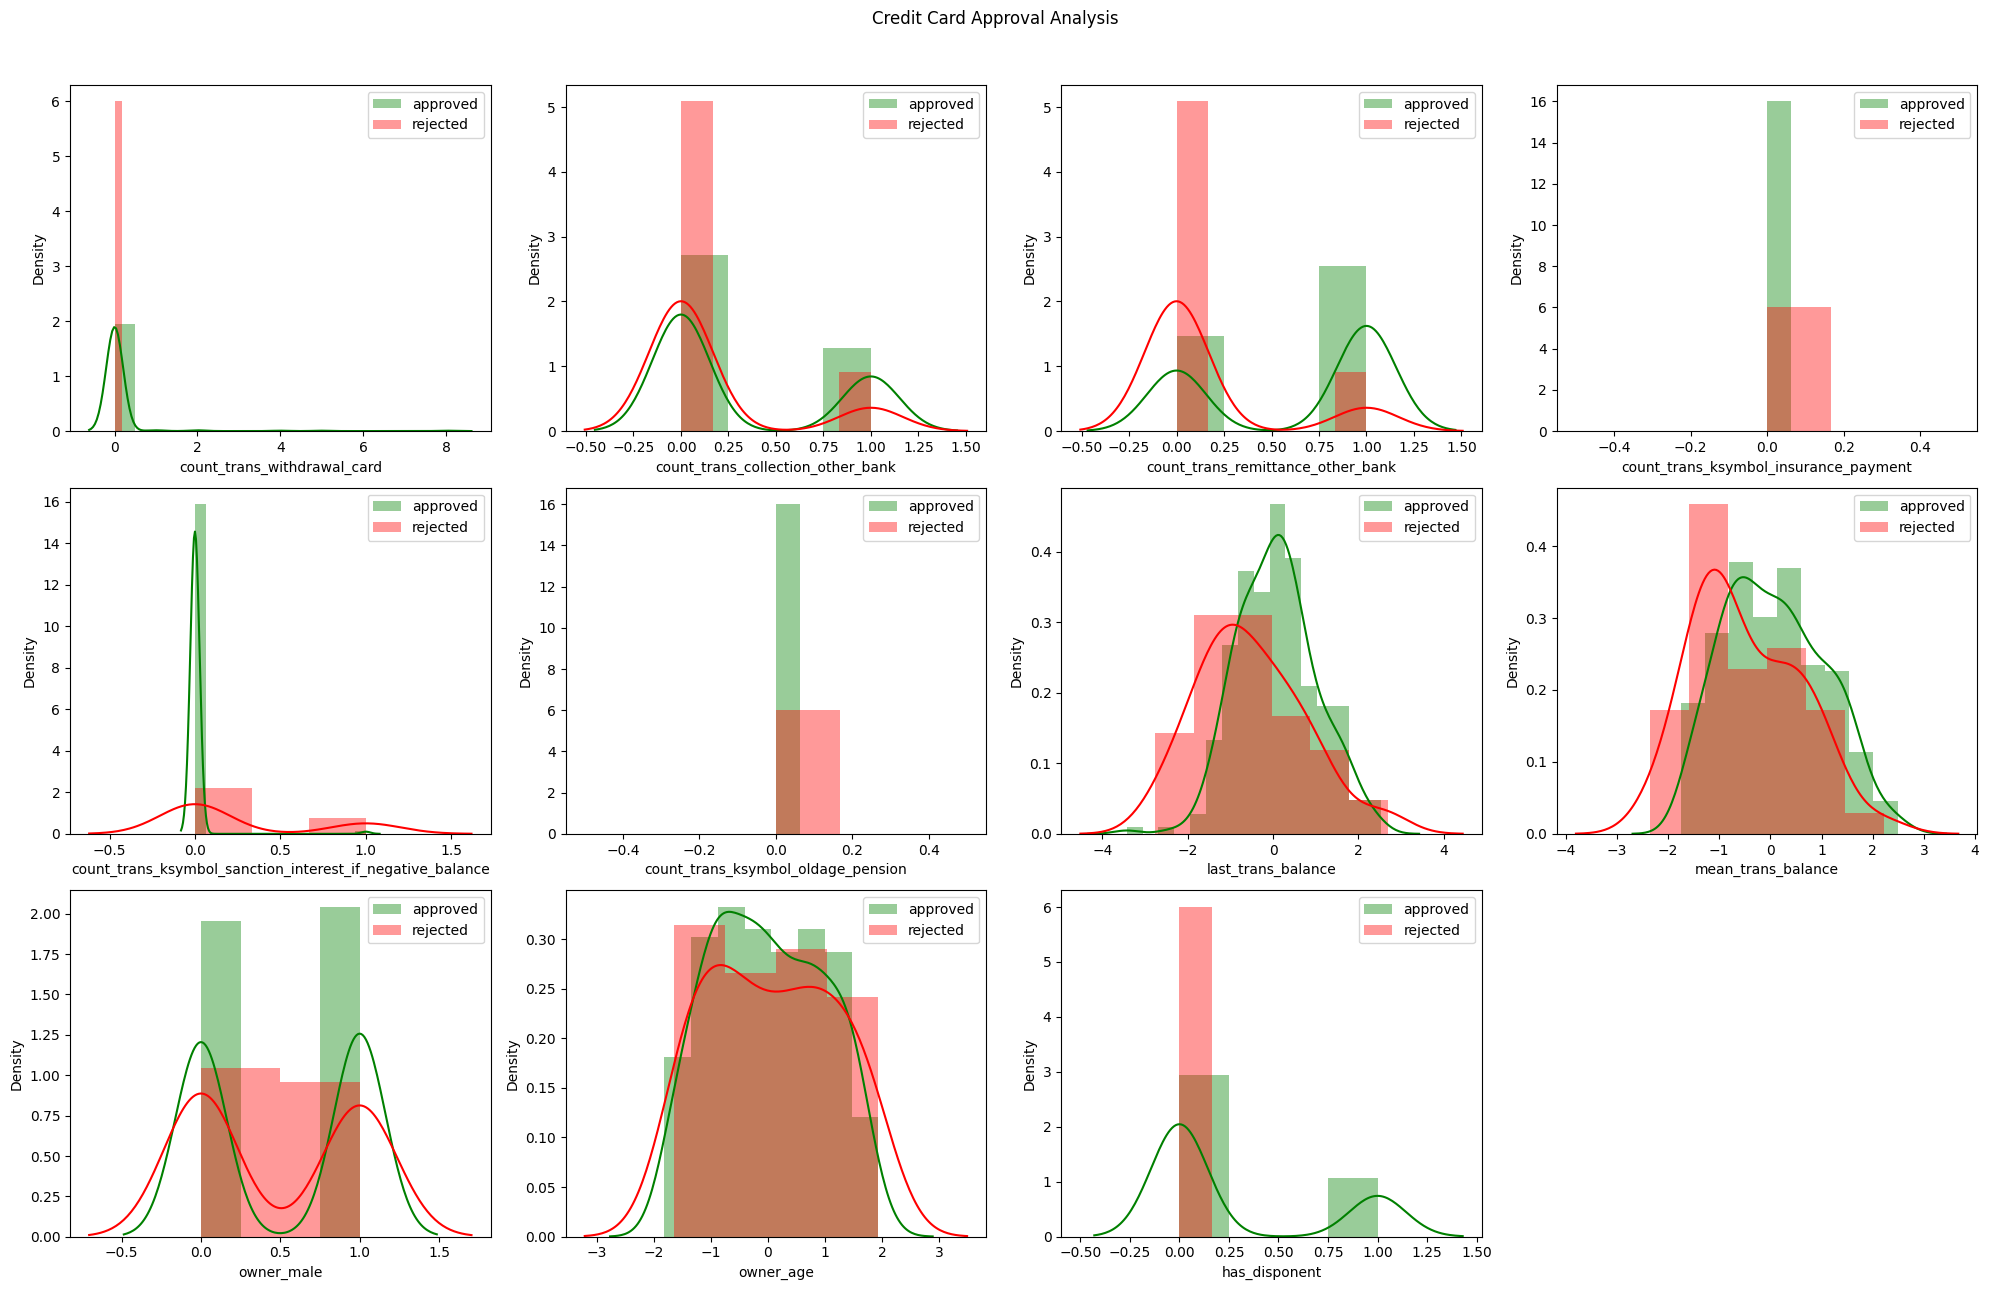

In [19]:
fig = plt.figure(figsize = (20, 25))
for j in range(24, len(data.columns)):
    i = data.columns[j]
    plt.subplot(6, 4, j - 24 +1)
    sns.distplot(data[i][data['Predicted']==0], color='g', label = 'approved')
    sns.distplot(data[i][data['Predicted']==1], color='r', label = 'rejected')
    plt.legend(loc='best')
fig.suptitle('Credit Card Approval Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [22]:
Y = data["Predicted"].values
X = data.drop(["Predicted", "loan_date"], axis=1).values

In [23]:

estimator = DecisionTreeClassifier(splitter='best', min_samples_split=6, min_samples_leaf=5, max_features='sqrt', max_depth=41, criterion='gini')
selector = RFECV(estimator, cv=TimeSeriesSplit(), scoring='roc_auc')
selector.fit(X, Y)


RFECV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
      estimator=DecisionTreeClassifier(max_depth=41, max_features='sqrt',
                                       min_samples_leaf=5,
                                       min_samples_split=6),
      scoring='roc_auc')

c:\Users\nrtc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


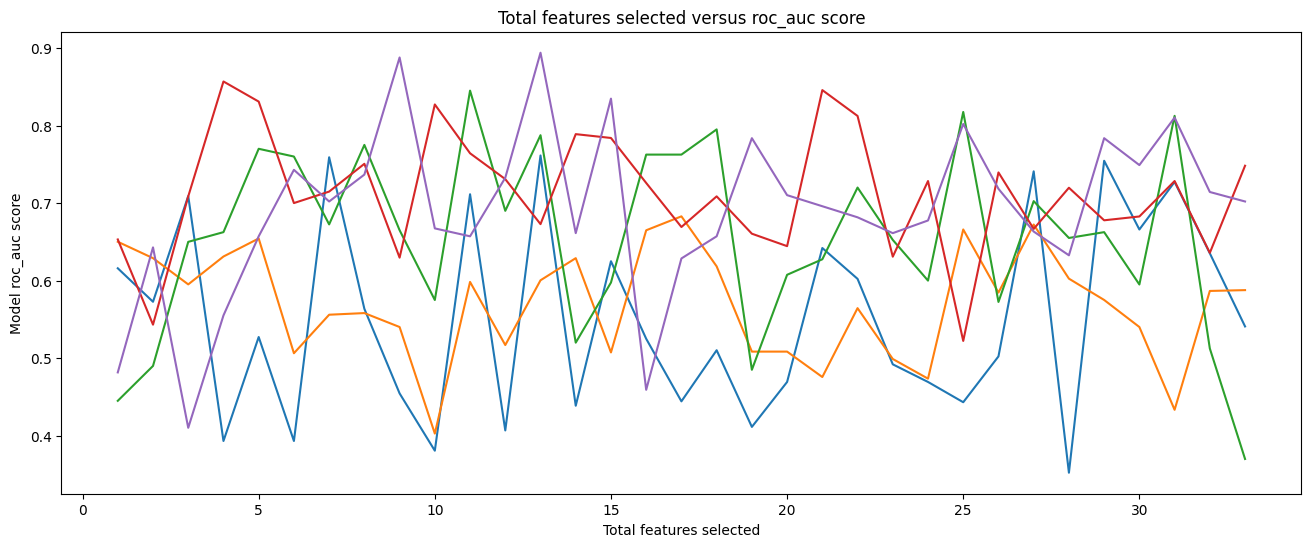

In [30]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus roc_auc score')
plt.xlabel('Total features selected')
plt.ylabel('Model roc_auc score')
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()


In [25]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': selector.support_[i], 'ranking': selector.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(10)


C:\Users\nrtc\AppData\Local\Temp\ipykernel_18232\1288347173.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\nrtc\AppData\Local\Temp\ipykernel_18232\1288347173.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\nrtc\AppData\Local\Temp\ipykernel_18232\1288347173.py:5: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\nrtc\AppData\Local\Temp\ipykernel_18232\1288347173.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

,feature,support,ranking
15,15,True,1
28,28,True,1
26,26,True,1
24,24,True,1
23,23,True,1
21,21,True,1
20,20,True,1
19,19,True,1
18,18,True,1
31,31,True,1


In [58]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
sfs = SFS(RandomForestClassifier(), scoring="roc_auc", forward=False, k_features='best', cv=5, n_jobs=-1)
sfs.fit(X, Y)


SequentialFeatureSelector(estimator=RandomForestClassifier(), forward=False,
                          k_features=(1, 33), n_jobs=-1, scoring='roc_auc')

TypeError: 'bool' object is not subscriptable

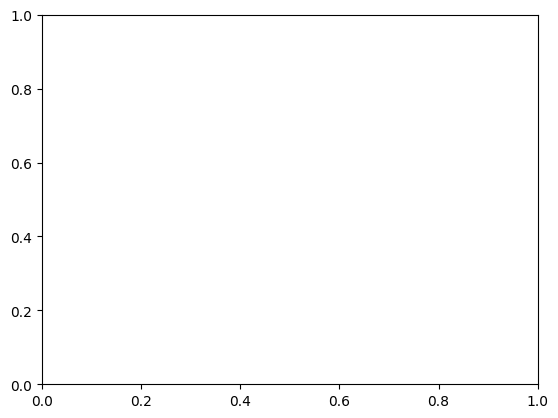

In [59]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_params(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus roc_auc score')
plt.xlabel('Total features selected')
plt.ylabel('Model roc_auc score')
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [60]:
selected_features = selector.get_support(1)
selected_features

array([10, 15, 18, 19, 20, 21, 23, 24, 26, 28, 29, 30, 31], dtype=int64)

In [29]:
new_inputs = data[data.columns[selected_features]]
new_inputs.columns

Index(['account_district_no_municipalities_10000_plus',
       'account_district_no_enterpreneurs_per_1000_inhabitants',
       'owner_district_no_cities', 'owner_district_ratio_urban_inhabitants',
       'owner_district_average_salary',
       'owner_district_no_enterpreneurs_per_1000_inhabitants',
       'count_trans_credit_cash', 'count_trans_withdrawal_card',
       'count_trans_remittance_other_bank',
       'count_trans_ksymbol_sanction_interest_if_negative_balance',
       'count_trans_ksymbol_oldage_pension', 'last_trans_balance',
       'mean_trans_balance'],
      dtype='object')